In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Core Project/testset.csv")
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [ ]:
#exploring data
data.shape

(100990, 20)

In [ ]:
print(data.columns)

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')


In [ ]:
#top 5 entries showing date and temp
data=data[["datetime_utc"," _tempm"]]
data.head()

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [ ]:
data.columns=["date","temp"]
data.columns

Index(['date', 'temp'], dtype='object')

In [ ]:
data.dtypes

date     object
temp    float64
dtype: object

In [ ]:
data["date"]=pd.to_datetime(data["date"],format="%Y%m%d-%H:%M")
data.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [ ]:
data=data.set_index("date")

In [ ]:
#last 5 entries in data set

data.tail()

,temp
date,
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0
2017-04-24 15:00:00,32.0
2017-04-24 18:00:00,30.0


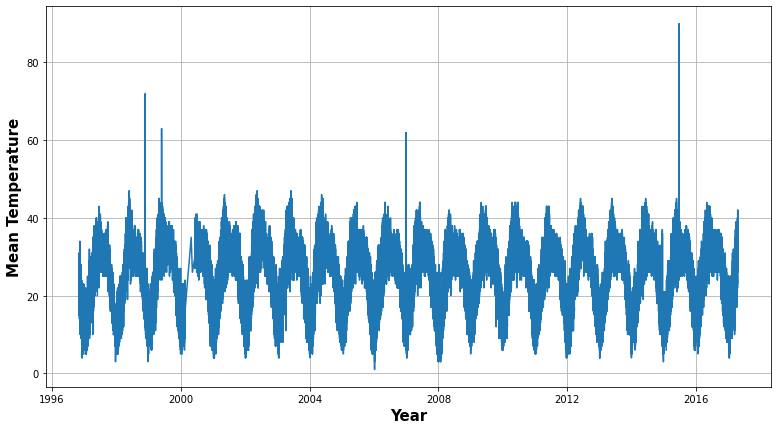

In [ ]:
#visualization of mean temperature of data set

fig=plt.figure(figsize=(13,7),facecolor="white")
ax = plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(data)
plt.show()

In [ ]:
#total null values in the tempm
null=data[data.isnull().any(axis=1)]
print("Null values:",null.shape[0])

Null values: 673


In [ ]:
#null items in data in temperature attribute

data.isnull().sum()

temp    673
dtype: int64

In [ ]:
#null items in data

data.isnull().sum()

 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

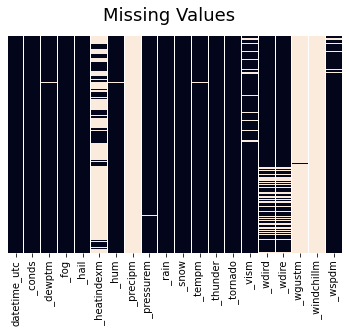

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
fig.suptitle('Missing Values', fontsize=18);

#white are the missing values, blue shows the presence of data in dataset for respected attributes

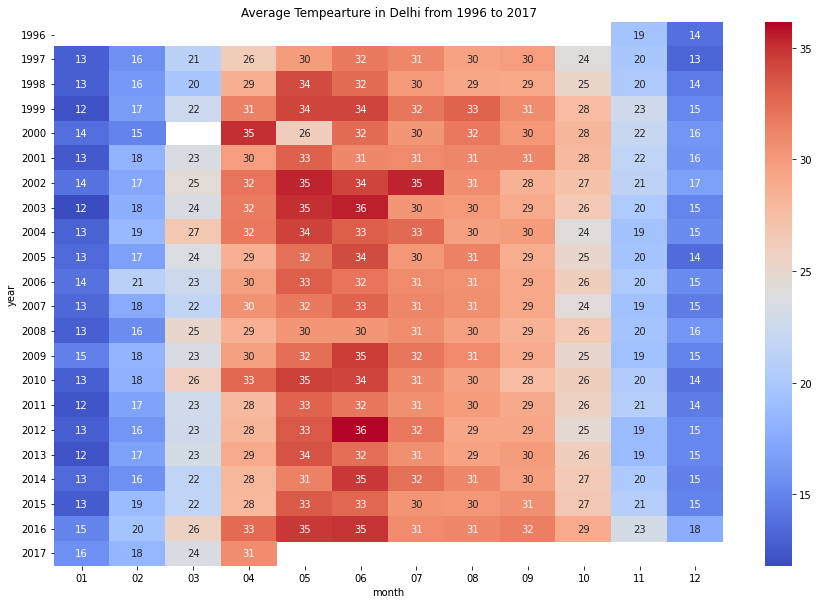

In [ ]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
str(data['datetime_utc'][0])
# making two new features year and month
def get_year(x):
  return x[0:4]

# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

data['year'] = data['datetime_utc'].apply(lambda x: get_year(str(x)))
data['month'] = data['datetime_utc'].apply(lambda x: get_month(str(x)))

temp_year = pd.crosstab(data['year'], data['month'], values=data[' _tempm'], aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

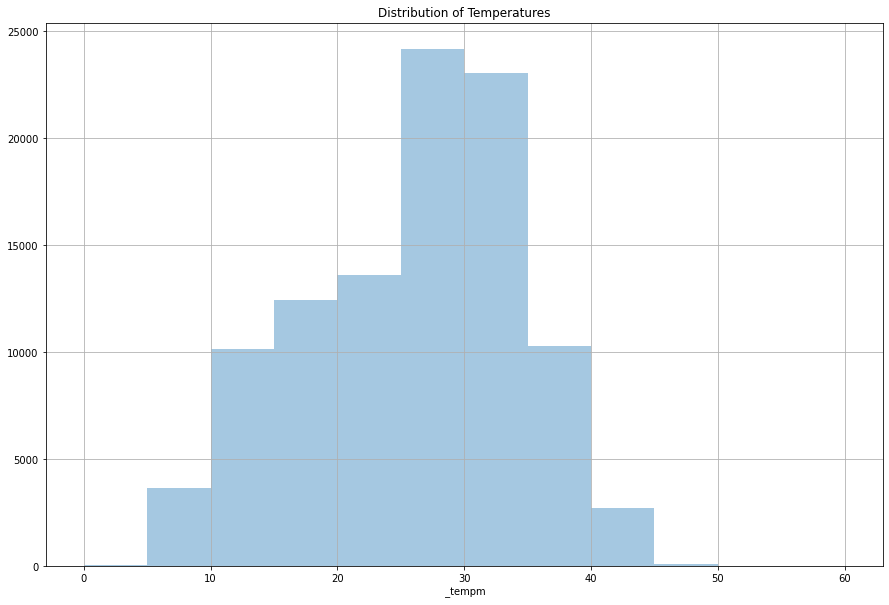

In [ ]:
#Most common temperature scale in Delhi is from 25 to 35 degree.

plt.figure(figsize=(15, 10))
sns.distplot(data[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
hourly_mean=data.groupby(data.index.hour).mean()
yearly_mean=data.groupby(data.index.year).mean()

In [ ]:
# resampleing our hourly data into daily data using the resampling method
daily=data.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(data.shape[0]-daily.shape[0]))

Sample reduced by 93510 rows after resampling


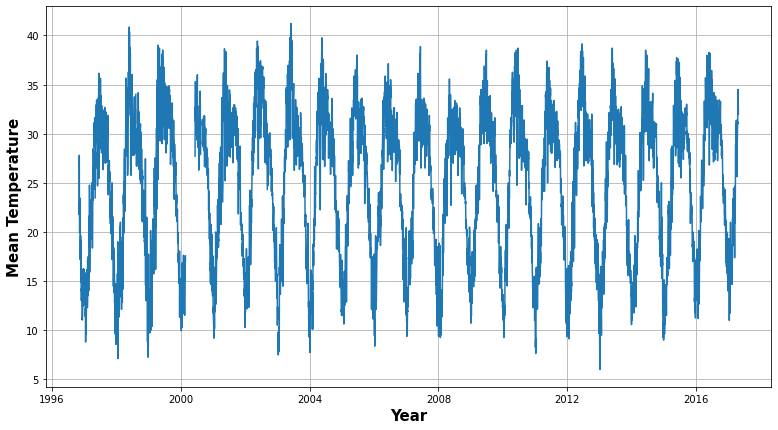

In [ ]:
#As we plot our daily data we now observe that in between 2000-2001 there are huge amount of missing data,
#so we will take the dataset from 2001 and drop the data of preceding days.
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [ ]:
#dropping data till 31-12-2000
daily=daily["2001-01-01":]
daily.shape

(5958, 1)

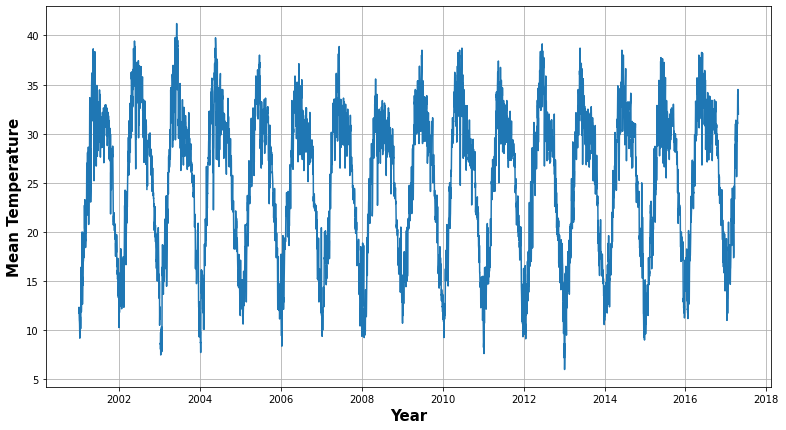

In [ ]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [ ]:
print("Null values before:",daily.isnull().sum())

daily=daily.fillna(method="ffill")

print("Null values After:",daily.isnull().sum())

Null values before: temp    4
dtype: int64
Null values After: temp    0
dtype: int64


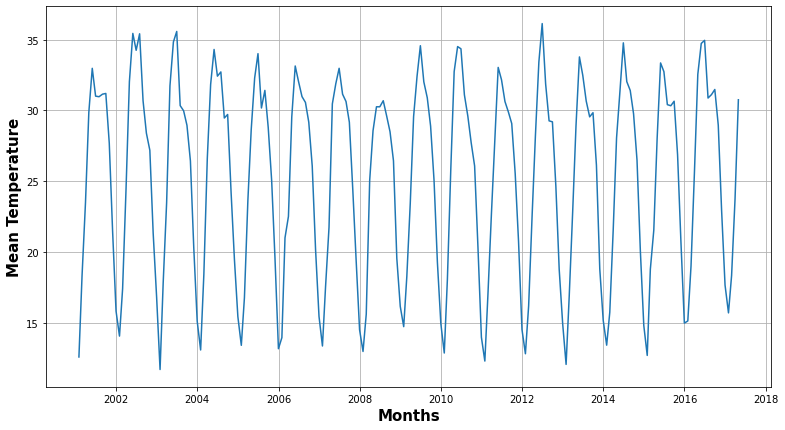

In [ ]:
#monthly data analysis

monthly = daily.resample("M").mean()
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

In [ ]:
#Data Splitting
#We will use 2002-2015 to train the model and 2015-2017 for testing purpose
train=monthly["temp"][:"2015-01-01"].to_frame()
test=monthly["temp"]["2015-01-01":].to_frame()

train.shape,test.shape

((168, 1), (28, 1))

In [ ]:
#LSTM Model
#buliding a neural network to frocast data
#We have our train and test data ready, but to feed data into neural network we have to transform the data,
#for this purpose I have Normalized the data between 0-1, using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_scale=scaler.fit_transform(train)
test_scale=scaler.transform(test)

In [ ]:
#preparing the data

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#TimeseriesGenerator takes arguments
#data (data from where we generate sequence),
#targets (data from where we generate targets),
#length (time steps to consider for building sequnce)

time_step=12
generator=TimeseriesGenerator(data=train_scale,
                              targets=train_scale,
                              length=time_step,
                              batch_size=1
                             )

In [ ]:
#Now data is ready and we build Neural Networks to feed in the training data
#pranav

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#Initialize sequentail model

model=Sequential()

In [ ]:
#Model Building and Model Compiling

model.add(LSTM(100,activation="relu",input_shape=(time_step,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64,activation="relu"))
model.add(Dropout(0.01))

model.add(Dense(32))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mean_squared_error",
              metrics=["mse"]
             )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 12, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 85,153
Trainable params: 85,153
Non-traina

In [ ]:
#Set a call back for the model with patience = 50
#dhruva

from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor="loss",patience=50)

In [ ]:
#fitting/running the model with training data
#running/training 3 datapoits through the model at once

model.fit(generator,epochs=200,steps_per_epoch=3,verbose=False,callbacks=[callback])

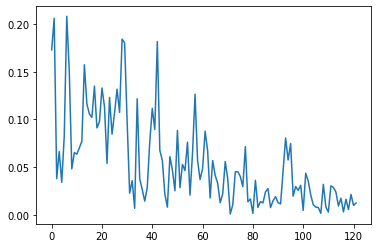

In [ ]:
#Visualizing loss per epoch, the loss is varying overtime but decreases significantly with increase in epoch

loss_per_epoch=model.history.history["loss"]
plt.plot(loss_per_epoch)
plt.show()

In [ ]:
#Getting the test prediction

test_pred=[]

test_batch=train_scale[-time_step:]
current_batch=test_batch.reshape(1,time_step,1)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    test_pred.append(pred)

    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

In [ ]:
#predicted values in scaled form

test_pred

[array([0.24149093], dtype=float32),
 array([0.33511916], dtype=float32),
 array([0.5007676], dtype=float32),
 array([0.6954852], dtype=float32),
 array([0.84674126], dtype=float32),
 array([0.9230146], dtype=float32),
 array([0.9179465], dtype=float32),
 array([0.89445], dtype=float32),
 array([0.77221125], dtype=float32),
 array([0.5631487], dtype=float32),
 array([0.28759205], dtype=float32),
 array([0.1832214], dtype=float32),
 array([0.24014834], dtype=float32),
 array([0.3542724], dtype=float32),
 array([0.515077], dtype=float32),
 array([0.70098597], dtype=float32),
 array([0.8684221], dtype=float32),
 array([0.98213804], dtype=float32),
 array([1.0283568], dtype=float32),
 array([0.9677996], dtype=float32),
 array([0.7616607], dtype=float32),
 array([0.502066], dtype=float32),
 array([0.22068542], dtype=float32),
 array([0.17897877], dtype=float32),
 array([0.24205276], dtype=float32),
 array([0.36345407], dtype=float32),
 array([0.53441674], dtype=float32),
 array([0.74107635]

In [ ]:
#inversing the transformation of the scaled data into its original scale to get the temperature

true_pred=scaler.inverse_transform(test_pred)

In [ ]:
test["pred"]=true_pred

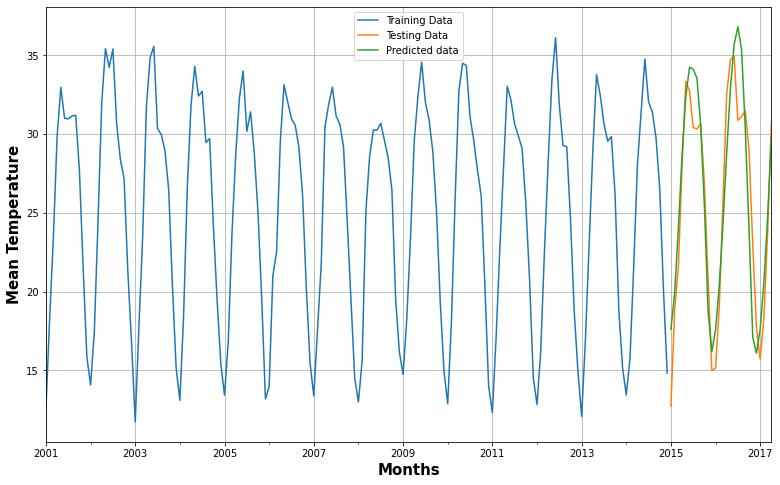

In [ ]:
#Plot showing traning testing and predicted temperature using LSTM

ax=train["temp"].plot(label="Training Data",figsize=(13,8))
ax.set_facecolor("white")
test["temp"].plot(label="Testing Data")
test["pred"].plot(label="Predicted data",ax=ax)
plt.grid(True)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.legend(loc="best")
plt.show()

In [ ]:
acc = (100 * (test_scale - test_pred)/test_scale)

In [ ]:
#test accuracy

acc = (100 * (test_scale - test_pred)/test_scale)

np.absolute(acc).mean()

73.15848869590147